In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('Glassdoor_ds_jobs_cleaned.csv')

In [8]:
df.head()

,Job Title,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,...,R,SQL,Machine Learning,Deep Learning,Big Data,Statistic,Math,Master,AWS,SPARK
0,Data Scientist,We are looking for a Data Scientist to analyze...,4.2,workcog inc\n,Remote,51 to 200 Employees,2017,Company - Private,IT Services,Information Technology,...,1,0,0,0,0,1,1,0,0,0
1,Data Scientist,We are looking for a highly motivated and expe...,-1.0,"Trobus Technologies,LLC",Remote,-1,-1,-1,-1,-1,...,1,0,1,0,0,0,0,0,0,0
2,Junior Data Scientist,About ClimateAi\nClimateAi is on a mission to ...,5.0,ClimateAI\n,"San Francisco, CA",1 to 50 Employees,2008,Company - Private,-1,-1,...,1,0,0,0,0,0,0,0,0,0
3,Data Scientist,What will be your mission?\n\nAt Sony Pictures...,4.0,"Sony Pictures Entertainment, Inc.\n","Culver City, CA",5001 to 10000 Employees,1989,Subsidiary or Business Segment,Motion Picture Production & Distribution,Media,...,0,0,0,0,0,0,0,0,0,0
4,Junior Data Scientist Apprentice,Introduction\nAs a Junior Data Scientist at IB...,4.0,IBM\n,"New York, NY",10000+ Employees,1911,Company - Public,IT Services,Information Technology,...,1,0,1,0,0,1,1,1,0,1


In [9]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'Employer Provided', 'min salary', 'max salary', 'avg salary',
       'State', 'Age', 'Python', 'R', 'SQL', 'Machine Learning',
       'Deep Learning', 'Big Data', 'Statistic', 'Math', 'Master', 'AWS',
       'SPARK'],
      dtype='object')

In [25]:
def job_simplified(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'ml engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'principal' in title.lower() or 'lead' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'

In [18]:
df['Job simplified'] = df['Job Title'].apply(job_simplified)

In [21]:
df['Job simplified'].value_counts()

data scientist    623
ml engineer         3
data engineer       1
Name: Job simplified, dtype: int64

In [27]:
df['Seniority'] = df['Job Title'].apply(seniority)

In [29]:
df['Seniority'].value_counts()

na        695
junior     60
senior      3
Name: Seniority, dtype: int64

In [31]:
df['State'].value_counts()

New York             131
Boston               128
San Francisco         98
Remote                43
Onamia                32
Corning               32
February              30
Franklin              30
Bristol               30
San Diego             28
Princeton             26
Fairless Hills        25
DeForest              25
Beaverton             15
Ann Arbor             13
Saline                11
Morrisville            8
White Plains           7
O'Fallon               6
Plano                  5
Austin                 4
Chicago                3
Salt Lake City         3
Arlington              3
Wellesley              2
Lexington              2
California             2
Houston                1
Portland               1
Yardley                1
Durham                 1
Atlanta                1
Culver City            1
Denver                 1
Greenwood Village      1
Los Gatos              1
Tysons Corner          1
Arlington Heights      1
California City        1
San Ramon              1


In [35]:
# Job description length
len(df['Job Description'][0])
df['job desc len'] = df['Job Description'].apply(lambda x: len(x))

In [38]:
df['job desc len']

0       611
1       529
2       465
3       753
4      3943
       ... 
753     193
754     721
755     678
756    1212
757    1735
Name: job desc len, Length: 758, dtype: int64

In [46]:
# Remve \n from the Company Name
df['Company Name'] = df['Company Name'].apply(lambda x: x.replace('\n', ''))

In [49]:
df.describe()

,Rating,Founded,hourly,Employer Provided,min salary,max salary,avg salary,Age,Python,R,SQL,Machine Learning,Deep Learning,Big Data,Statistic,Math,Master,AWS,SPARK,job desc len
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.00000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,3.696438,1953.232190,0.063325,0.196570,78.699208,140.193931,109.44657,55.416887,0.098945,0.728232,0.021108,0.410290,0.011873,0.113456,0.336412,0.192612,0.050132,0.015831,0.047493,973.476253
std,1.275012,166.498254,0.243707,0.397667,39.187073,45.674000,40.33776,48.483097,0.298785,0.445165,0.143840,0.492211,0.108388,0.317359,0.472794,0.394611,0.218361,0.124904,0.212832,774.754174
min,-1.000000,-1.000000,0.000000,0.000000,32.000000,50.000000,45.00000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104.000000
25%,3.800000,1931.000000,0.000000,0.000000,63.000000,118.000000,91.00000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,488.750000
50%,4.000000,1985.000000,0.000000,0.000000,73.000000,144.000000,109.50000,32.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,721.000000
75%,4.200000,2006.000000,0.000000,0.000000,85.000000,164.000000,123.00000,86.500000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1051.000000
max,5.000000,2021.000000,1.000000,1.000000,336.000000,384.000000,360.00000,172.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4383.000000


<AxesSubplot:>

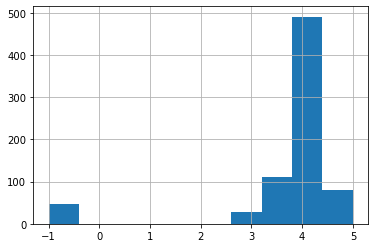

In [51]:
df.Rating.hist()

<AxesSubplot:>

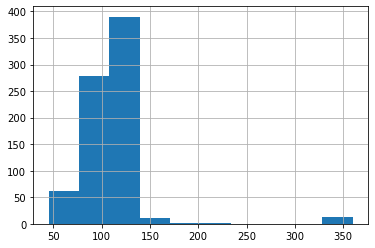

In [53]:
df['avg salary'].hist()

<AxesSubplot:>

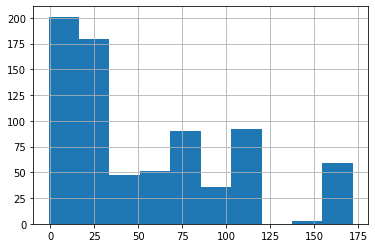

In [56]:
df.Age.hist()

<AxesSubplot:>

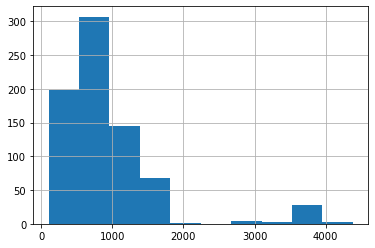

In [60]:
df['job desc len'].hist()

In [62]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'Employer Provided', 'min salary', 'max salary', 'avg salary',
       'State', 'Age', 'Python', 'R', 'SQL', 'Machine Learning',
       'Deep Learning', 'Big Data', 'Statistic', 'Math', 'Master', 'AWS',
       'SPARK', 'Job simplified', 'Seniority', 'job desc len'],
      dtype='object')

<AxesSubplot:>

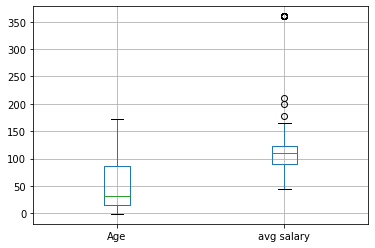

In [64]:
df.boxplot(column = ['Age', 'avg salary'])

In [67]:
# Correlation between variables
df[['Age', 'avg salary', 'Rating', 'job desc len']].corr()

,Age,avg salary,Rating,job desc len
Age,1.000000,0.038202,0.147082,0.265423
avg salary,0.038202,1.000000,-0.077690,-0.113274
Rating,0.147082,-0.077690,1.000000,0.199780
job desc len,0.265423,-0.113274,0.199780,1.000000


<AxesSubplot:>

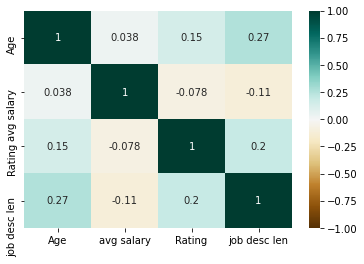

In [74]:
sns.heatmap(df[['Age', 'avg salary', 'Rating', 'job desc len']].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [76]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'Employer Provided', 'min salary', 'max salary', 'avg salary',
       'State', 'Age', 'Python', 'R', 'SQL', 'Machine Learning',
       'Deep Learning', 'Big Data', 'Statistic', 'Math', 'Master', 'AWS',
       'SPARK', 'Job simplified', 'Seniority', 'job desc len'],
      dtype='object')

In [79]:
 df_cat = df[['Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company Name',
     'State', 'Python', 'R', 'SQL', 'Machine Learning',
       'Deep Learning', 'Big Data', 'Statistic', 'Math', 'Master', 'AWS',
       'SPARK', 'Job simplified', 'Seniority']]
df_cat.corr()

,Founded,Python,R,SQL,Machine Learning,Deep Learning,Big Data,Statistic,Math,Master,AWS,SPARK
Founded,1.000000,-0.046083,-0.015491,-0.083164,-0.036529,-0.131914,0.032551,0.056281,-0.013187,-0.038290,-0.096221,-0.036472
Python,-0.046083,1.000000,0.202434,0.350925,0.361348,0.045258,-0.090683,0.128760,0.230290,0.531295,0.028766,0.569981
R,-0.015491,0.202434,1.000000,0.069076,-0.039068,0.066964,0.078282,0.102311,0.147978,0.140343,0.029964,0.136410
SQL,-0.083164,0.350925,0.069076,1.000000,0.101415,0.153366,0.005345,0.050842,0.091189,0.050381,0.128430,0.096662
Machine Learning,-0.036529,0.361348,-0.039068,0.101415,1.000000,0.131418,0.293575,0.274607,0.170693,0.263132,-0.041330,0.242485
Deep Learning,-0.131914,0.045258,0.066964,0.153366,0.131418,1.000000,-0.039214,-0.026492,0.008231,0.309706,-0.013903,0.261846
Big Data,0.032551,-0.090683,0.078282,0.005345,0.293575,-0.039214,1.000000,0.229509,0.141720,-0.082185,0.021279,-0.079882
Statistic,0.056281,0.128760,0.102311,0.050842,0.274607,-0.026492,0.229509,1.000000,0.685985,0.220292,-0.090304,0.221720
Math,-0.013187,0.230290,0.147978,0.091189,0.170693,0.008231,0.141720,0.685985,1.000000,0.347709,-0.061947,0.347072
Master,-0.038290,0.531295,0.140343,0.050381,0.263132,0.309706,-0.082185,0.220292,0.347709,1.000000,-0.029137,0.915131


In [81]:
df_cat['Founded'].value_counts().index

Int64Index([2016, 1911, 2000, 1991, 1948, 1851, 2006, 2015, 1942, 1912, 1985,
            2014, 1995, 1924, 2008, 2005, 1858, 1996, 1946, 1969, 1972, 1968,
            1957, 1994, 1966, 1931, 2004, 2011,   -1, 2017, 2013, 1937, 1914,
            1967, 2020, 1980, 1870, 1938, 2001, 2010, 1850, 1876, 1909, 1998,
            2007, 1961, 1935, 1997, 1989, 1947, 1949, 2021],
           dtype='int64')

Graph for Location: Total = 43


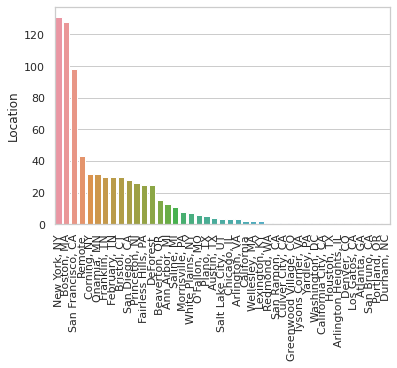

Graph for Size: Total = 9


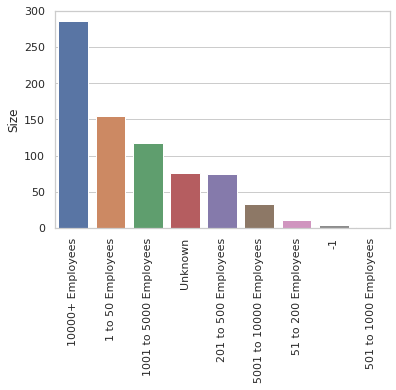

Graph for Founded: Total = 52


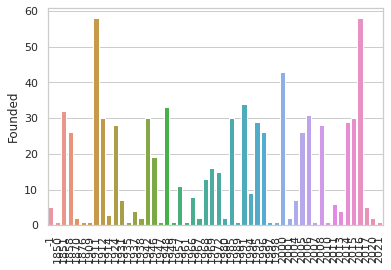

Graph for Type of ownership: Total = 12


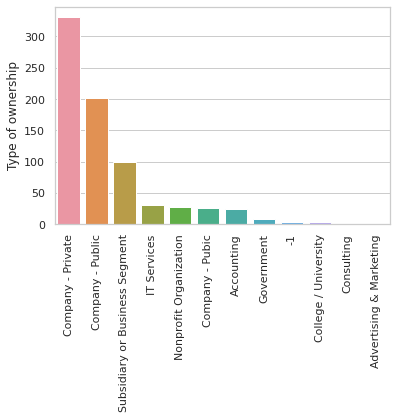

Graph for Industry: Total = 35


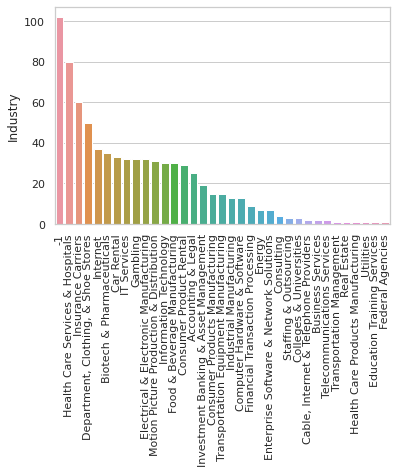

Graph for Sector: Total = 22


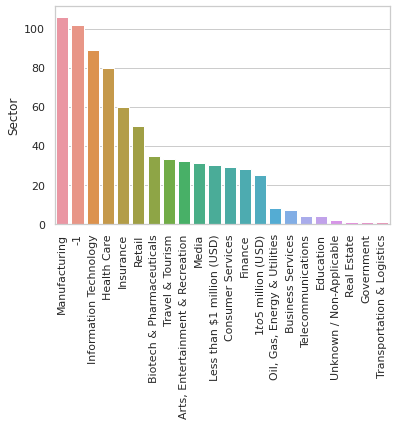

Graph for Revenue: Total = 11


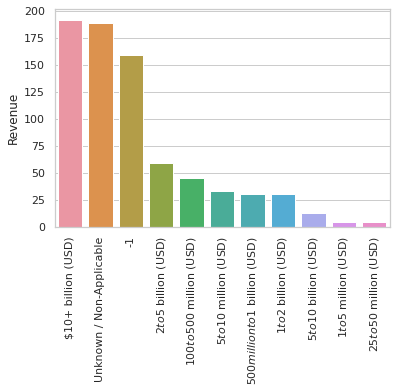

Graph for Company Name: Total = 77


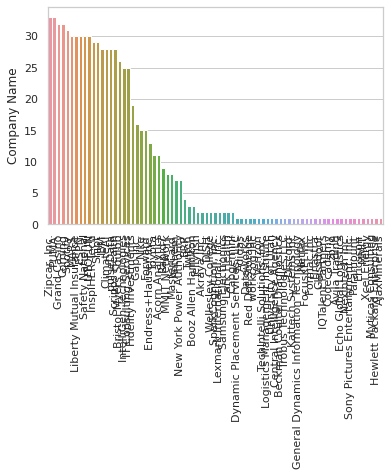

Graph for State: Total = 43


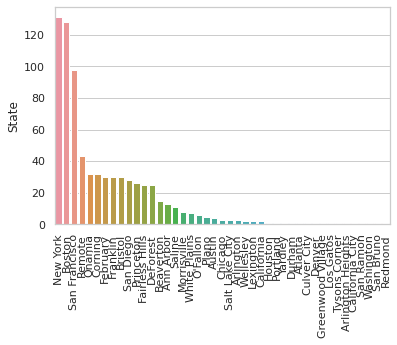

Graph for Python: Total = 2


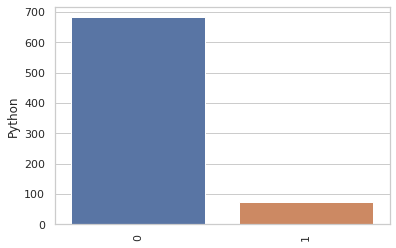

Graph for R: Total = 2


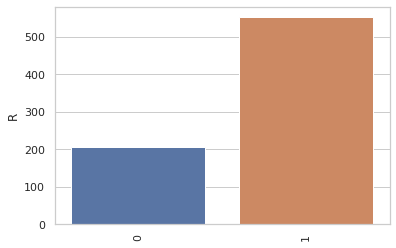

Graph for SQL: Total = 2


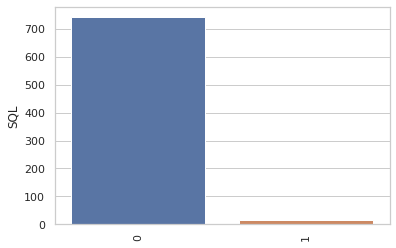

Graph for Machine Learning: Total = 2


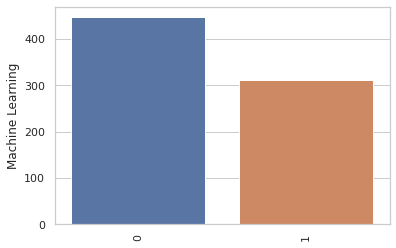

Graph for Deep Learning: Total = 2


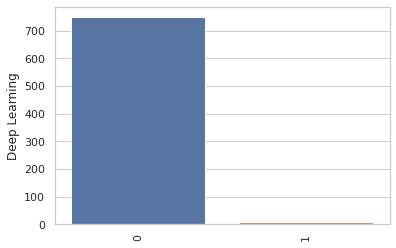

Graph for Big Data: Total = 2


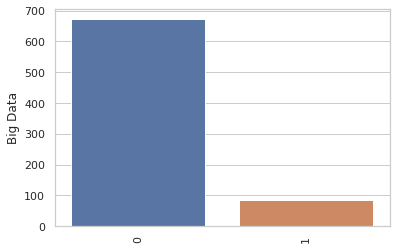

Graph for Statistic: Total = 2


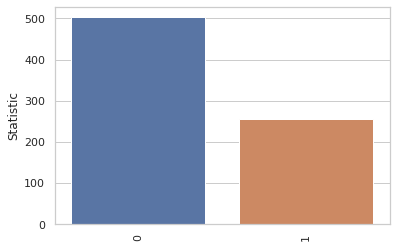

Graph for Math: Total = 2


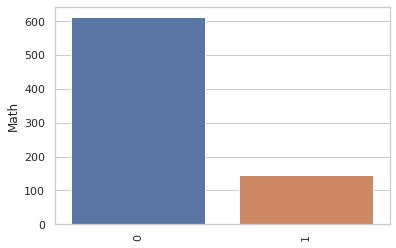

Graph for Master: Total = 2


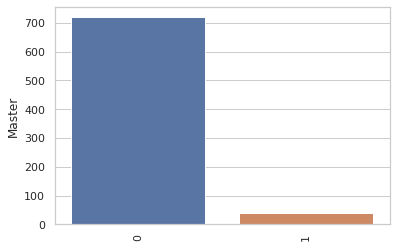

Graph for AWS: Total = 2


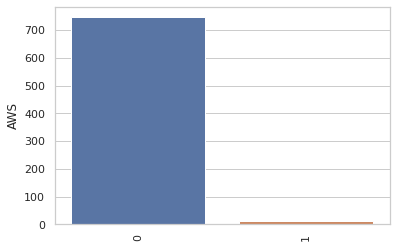

Graph for SPARK: Total = 2


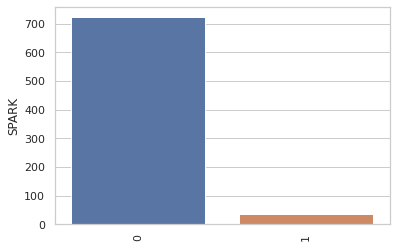

Graph for Job simplified: Total = 3


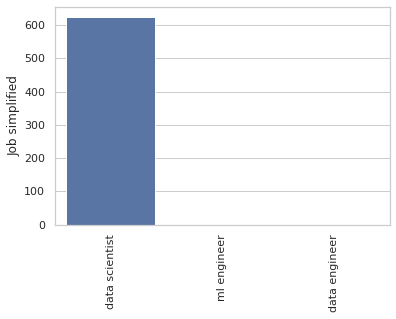

Graph for Seniority: Total = 3


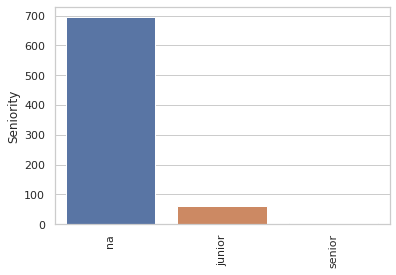

In [89]:
for i in df_cat.columns:
    sns.set_theme(style="whitegrid")
    df_cat_num = df_cat[i].value_counts()
    print('Graph for %s: Total = %d' % (i, len(df_cat_num)))
    ax = sns.barplot(x=df_cat_num.index, y=df_cat_num)
    ax.tick_params(axis='x', rotation=90)
    plt.show(ax)

Graph for Location: Total = 20


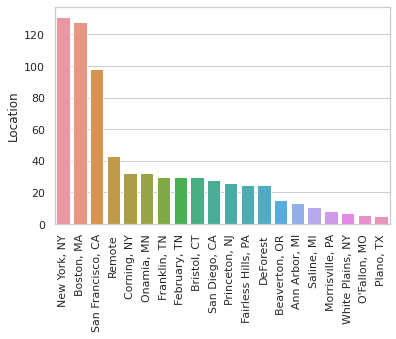

Graph for Founded: Total = 20


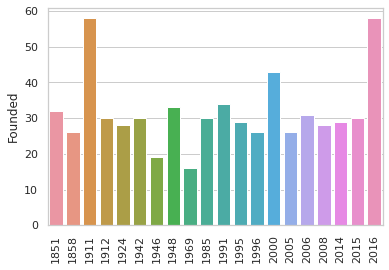

Graph for Industry: Total = 20


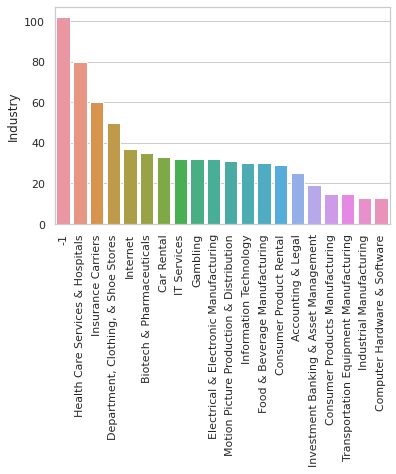

Graph for Company Name: Total = 20


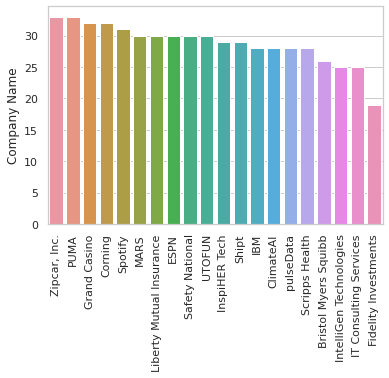

In [96]:
for i in df_cat[['Location', 'Founded', 'Industry', 'Company Name']].columns:
    sns.set_theme(style="whitegrid")
    df_cat_num = df_cat[i].value_counts()[:20]
    print('Graph for %s: Total = %d' % (i, len(df_cat_num)))
    ax = sns.barplot(x=df_cat_num.index, y=df_cat_num)
    ax.tick_params(axis='x', rotation=90)
    plt.show(ax)

In [97]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'Employer Provided', 'min salary', 'max salary', 'avg salary',
       'State', 'Age', 'Python', 'R', 'SQL', 'Machine Learning',
       'Deep Learning', 'Big Data', 'Statistic', 'Math', 'Master', 'AWS',
       'SPARK', 'Job simplified', 'Seniority', 'job desc len'],
      dtype='object')

In [99]:
pd.pivot_table(df, index='Job simplified', values='avg salary')

,avg salary
Job simplified,
data engineer,85.000000
data scientist,114.605939
ml engineer,158.833333


In [110]:
pd.pivot_table(df, index=['Company Name', 'Job simplified', 'Seniority'], values='avg salary').sort_values(by='avg salary',ascending=False).head(50)

,,,avg salary
Company Name,Job simplified,Seniority,
Endress+Hauser Inc.,data scientist,na,360.000000
IQTalent Partners,data scientist,na,211.000000
"Trobus Technologies,LLC",data scientist,na,200.000000
Netflix,data scientist,senior,178.500000
Twitch,data scientist,na,164.500000
Glassdoor,ml engineer,na,161.500000
Twitch,ml engineer,na,157.500000
Formac Inc,data scientist,na,150.000000
Nexintech Inc.,data scientist,na,146.000000


In [124]:
pd.pivot_table(df, index=['Location', 'Job simplified'], values='avg salary').sort_values(by='avg salary',ascending=False).head(20)

,,avg salary
Location,Job simplified,
"Ann Arbor, MI",data scientist,360.000000
"Los Gatos, CA",data scientist,178.500000
"San Francisco, CA",ml engineer,158.833333
"Redmond, WA",data scientist,146.000000
"San Ramon, CA",data scientist,140.000000
"Corning, NY",data scientist,129.500000
"Culver City, CA",data scientist,128.000000
"Salt Lake City, UT",data scientist,127.000000
California,data scientist,127.000000


In [125]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
df['Job Title']

0                                         Data Scientist
1                                         Data Scientist
2                                  Junior Data Scientist
3                                         Data Scientist
4                       Junior Data Scientist Apprentice
5                                         Data Scientist
6                      BHJOB15656_16794 - Data Scientist
7                                         Data scientist
8                    Data Scientist, Spotify For Artists
9                                    Lead Data Scientist
10                                        Data Scientist
11                  Data Scientist and Computer Engineer
12                                        Data Scientist
13                                        Data Scientist
14                                     Sr Data Scientist
15                            Data Scientist / Analytics
16                               Data Scientist (Remote)
17        MACHINE LEARNING DATA

In [126]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'Employer Provided', 'min salary', 'max salary', 'avg salary',
       'State', 'Age', 'Python', 'R', 'SQL', 'Machine Learning',
       'Deep Learning', 'Big Data', 'Statistic', 'Math', 'Master', 'AWS',
       'SPARK', 'Job simplified', 'Seniority', 'job desc len'],
      dtype='object')

In [137]:
# Salary vs (Rating, Industry, Sector, hourly, Employer Provided, 
# Python, R, SQL, Machine Learning, Statistic, Math, SPARK, job desc len, 
# type of ownership)
df_pivots = df[['Rating', 'Revenue', 'Industry', 'Sector', 'hourly', 'Employer Provided',
                'SQL', 'Machine Learning', 'Statistic', 'Math', 'SPARK', 
                'job desc len','Type of ownership']]

In [139]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df, index=i, values='avg salary').sort_values(by='avg salary', ascending=False))

Rating
        avg salary
Rating            
 4.8    136.500000
 3.8    128.432432
 3.6    125.333333
 4.4    124.666667
-1.0    124.404255
 4.0    121.793750
 4.9    119.500000
 4.5    118.733333
 4.2    113.775510
 3.4    111.500000
 4.7    111.500000
 4.3    111.058824
 3.7    105.048387
 3.9    102.912698
 5.0    102.175439
 3.1    101.000000
 3.3     91.469697
 3.0     91.000000
 4.1     75.830189
Revenue
                                  avg salary
Revenue                                     
$2 to $5 billion (USD)            164.610169
$25 to $50 million (USD)          134.250000
$5 to $10 billion (USD)           123.730769
$100 to $500 million (USD)        122.277778
$1 to $5 million (USD)            122.250000
$5 to $10 million (USD)           116.500000
Unknown / Non-Applicable          107.558201
$10+ billion (USD)                104.028646
-1                                 98.459119
$500 million to $1 billion (USD)   89.500000
$1 to $2 billion (USD)             87.500000
I

In [146]:
pd.pivot_table(df, index = 'Revenue', columns='Python', values='avg salary', aggfunc='count')

Python,0,1
Revenue,,
$1 to $2 billion (USD),30.0,NaN
$1 to $5 million (USD),3.0,1.0
$10+ billion (USD),160.0,32.0
$100 to $500 million (USD),43.0,2.0
$2 to $5 billion (USD),55.0,4.0
$25 to $50 million (USD),2.0,2.0
$5 to $10 billion (USD),12.0,1.0
$5 to $10 million (USD),33.0,NaN
$500 million to $1 billion (USD),30.0,NaN


In [147]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'Employer Provided', 'min salary', 'max salary', 'avg salary',
       'State', 'Age', 'Python', 'R', 'SQL', 'Machine Learning',
       'Deep Learning', 'Big Data', 'Statistic', 'Math', 'Master', 'AWS',
       'SPARK', 'Job simplified', 'Seniority', 'job desc len'],
      dtype='object')

In [149]:
# Create a WordCloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


ModuleNotFoundError: No module named 'wordcloud'